# Stellar-to-halo mass relation

The stellar-to-halo mass realtion (SHMR) is one of the fundamental relations when looking at a population of galaxies. It is well known that the evolution and properties of galaxies are strongly correlated to their dark matter (DM) halos. The SHMR is one that is easily available in computer models such as the IllustrisTNG, as the masses of different types of particles are directly part of the simulation.

Here, the SHMR is calculated from the group catalogs of the TNG100-1 run at redshift 0.

In [39]:
import illustris_python as il
import matplotlib.pyplot as plt
import numpy as np

The data is read into Python. Both the halos and the subhalos are loaded. The halos may include more than one subhalo. The halos with only one subhalo are so called "field-galaxies". The most massive galaxy in a halo is the "central galaxy", the other ones are defined as satellite galaxies.

In [40]:
basePath = "../data/tng100-1/output"
subhaloFields = ["SubhaloMass", 'SubhaloMassType', 'SubhaloFlag']
haloFields = ["GroupMass", "GroupMassType", "GroupNsubs", "GroupFirstSub"]
subhalos = il.groupcat.loadSubhalos(basePath,99,fields=subhaloFields)
halos = il.groupcat.loadHalos(basePath,99,fields=haloFields)

subhaloFlag = subhalos["SubhaloFlag"]
subhaloMasses = subhalos["SubhaloMassType"]
subhaloMass = subhalos["SubhaloMass"]
subhaloDmMass = []
subhaloStellarMass = []

numberOfSubhalos = halos["GroupNsubs"]
centralHalos = halos["GroupFirstSub"]
haloMasses = halos["GroupMassType"]
haloMass = halos["GroupMass"]

centralHaloDmMass = []
centralHaloStellarMass = []
centrals = 0
fieldHaloDmMass = []
fieldHaloStellarMass = []
fields = 0

The data set has over 6 million halos and over 4 million subhalos. The number of galaxies one wants to sample can be controlled here:

In [41]:
maxSH = len(subhaloMasses) #use whole data set
maxH = len(haloMasses)
step = 100 #use a smaller sample. Set equal to 1 if you want all the data shown.
n = 0

The first plot will show the SHMR for all the galaxies of the simulation. This includes field, centrals and satellite galaxies. A treshold of $ M_{min} = 10^{8} M_\odot $ has been implemented to restrict the amount of low mass satellite galaxies, which will be heavily influenced by their environment, affecting the SHMR. Also, subhalos with less than 10% DM mass are excluded, as these are most likely not galaxies of cosmological origin.

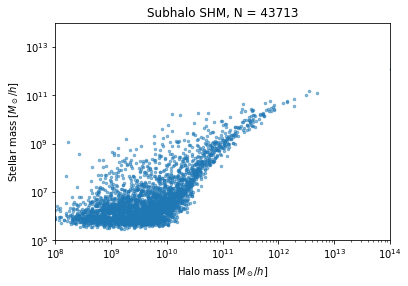

In [42]:

for i in range (0,maxSH,step):
    n = n + 1
    mass = subhaloMass[i]
    dm = subhaloMasses[i][1]
    stellar = subhaloMasses[i][4]
    ratio = dm/mass
    if (subhaloFlag[i] > 0) and (mass>0.01) and ratio>0.1: 
        subhaloDmMass.append(dm*10**10)
        subhaloStellarMass.append(stellar*10**10)     

#Subhalo plot
area = np.pi*2
plt.scatter(subhaloDmMass,subhaloStellarMass, s=area, alpha=0.5)
plt.axis([10**8, 10**14, 10**5, 10**14])
plt.xscale("log")
plt.yscale("log")

plt.title("Subhalo SHM, N = " + str(n))
plt.xlabel(r'Halo mass [$ M_\odot /h $]')
plt.ylabel(r"Stellar mass [$ M_\odot /h $]")
plt.show()

It is interesting to separate out the central galaxies and look at their SHMR. Central galaxies are much less affected by their environment as they are the dominant galaxy in their group (if not the only). Thus, central galaxies have properties that are more universal than satellites. Field galaxies have no other galaxies in their group and are therefore even less affected by environmental factors.

In [43]:
for i in range (0,maxH, step):
    mass = haloMass[i]
    dm = haloMasses[i][1]
    stellar = haloMasses[i][4]
    ratio = dm/mass
    m = centralHalos[i]
    if (mass >0.01) and (ratio>0.1):
        if numberOfSubhalos[i] == 1:
            fields = fields + 1
            fieldHaloDmMass.append(dm*10**10)
            fieldHaloStellarMass.append(stellar*10**10)
        if m>0:
            centralHaloDmMass.append(subhaloMasses[m][1]*10**10)
            centralHaloStellarMass.append(subhaloMasses[m][4]*10**10)
            centrals = centrals +1

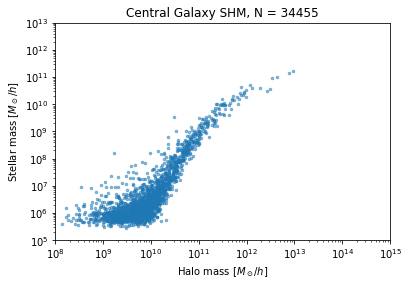

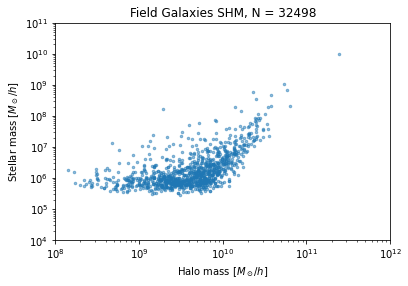

In [44]:
#Only central galaxies plot
area = np.pi*2
plt.scatter(centralHaloDmMass,centralHaloStellarMass, s=area, alpha=0.5)
plt.axis([10**8, 10**15, 10**5, 10**13])
plt.xscale("log")
plt.yscale("log")
plt.title("Central Galaxy SHM, N = " + str(centrals))
plt.xlabel(r'Halo mass [$ M_\odot /h $]')
plt.ylabel(r"Stellar mass [$M_\odot /h $]")
plt.show()

#Only field galaxies plot
area = np.pi*2
plt.scatter(fieldHaloDmMass,fieldHaloStellarMass, s=area, alpha=0.5)
plt.axis([10**8, 10**12, 10**4, 10**11])
plt.xscale("log")
plt.yscale("log")
plt.title("Field Galaxies SHM, N = " + str(fields))
plt.xlabel(r'Halo mass [$ M_\odot /h $]')
plt.ylabel(r"Stellar mass [$M_\odot /h $]")
plt.show()
